# 4.10 Achievement 4

## 01. Import Data
## 02. Remove PII
## 03. Generate Variable Comparisons and Visualizations
### A. Create Region Column
### B. Compare Region vs Spending
### C. Create Activity Level column
### D. Create Generation column
### E. Compare Generation vs Region
### F. Compare Departments vs Region
### G. Compare Departments vs Generation
### H. Create profile for households that purchase baby items
        i. Explore baby item purchases by region
        ii. Explore baby item purchases by generation
        iii. Determine most purchased item in baby department
        iv. Generation baby department purchases by number of dependents
### I. Create Income Level column
        i. Compare region vs income level
        ii. Compare purchases by income level
### J. Create Profile for Single Adult Households With No Dependents
        i. Single Adult Purchases by Time of Day
        ii. Single Adult Purchases by Department ID
        iii. Income level of single adults with no dependents
        iv. Single adults by generation
        v. Single adult dairy/egg purchases
        vi. Single adults by region
        vii. Single adults by region and generation
        viii. Single adults by generation and order frequency
        ix. Single adults by order day of week
### K. Explore number of dependents
        i. Compare number of dependents vs spending
### L. Explore Spending level
        ii. Explore region vs spending level
        ii. Explore hour of day vs spending level

### M. Create Product Price Range Column
        i. Purchases by product price range
### N. Purchases by Department ID
### O. Loyalty
        i. Compare region vs loyalty
        ii. Compare department vs loyalty
        iii. Compare price range vs loyalty
        iv. Compare loyalty vs spending level
### P. Marital Status
        i. Number of purchases by marital status
        ii. Compare loyalty vs marital status
        iii. Compare department purchases vs marital status
        iv. Compare loyalty vs marital status
        v. Compare order frequency vs marital status
        vi. Compare marital status vs generation


## 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path shortcut
path = r'/Users/mindydong/Documents/School/Data Analyst/Achievement 4/04-2023 Instacart Basket Analysis'

In [3]:
#import orders_products_customers.pkl
ords_prods_cust = pd.read_pickle(os.path.join (path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
#import departments_wrangled.csv
df_departments = pd.read_csv(os.path.join (path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 02. Remove PII

PII was removed previously.

## 03. Generate Variable Comparisons and Visualizations

### A. Create Region Column

In [5]:
#create for-loop for region column

region = []

for state in ords_prods_cust ['state']:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append ('West')
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append ('South')
    else:
        region.append ('NaN')

In [6]:
#create region column
ords_prods_cust['region'] = region

In [7]:
#check output
ords_prods_cust['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

### B. Compare Region vs Spending

In [8]:
#create crosstab of region and spender_flag
crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'], dropna = False)

In [9]:
#check output
crosstab.head()

spender_flag,High spender,Low spender
region,,
Midwest,156086,7447681
Northeast,108298,5620004
South,210011,10591428
West,160724,8139638


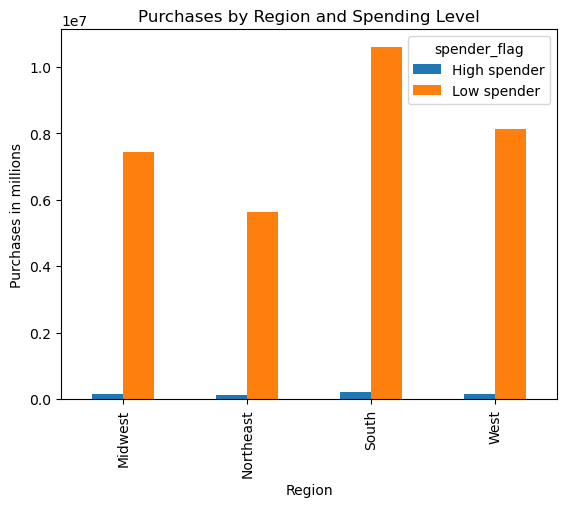

In [10]:
#create bar chart for regoin vs spender flag
region_spender_bar = crosstab.plot(kind = 'bar', title = 'Purchases by Region and Spending Level', xlabel = 'Region', ylabel= 'Purchases in millions', width = 0.5)

In [131]:
#export bar chart
region_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spender_bar.png'), bbox_inches='tight')

### C. Create Activity Level Column

In [12]:
#create low activity with Y = low activity
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_level'] = 'Y'

In [13]:
#create regular activity
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_level'] = 'N'

In [14]:
#check shape of activity level
ords_prods_cust['activity_level'].value_counts(dropna = False)

N    30992664
Y     1441548
Name: activity_level, dtype: int64

In [15]:
#check df output
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_dependents,marital_status,income,region,activity_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N


In [16]:
#check shape after creation of activity_level column
ords_prods_cust.shape

(32434212, 31)

In [17]:
#filter out activity_level = y (low activity) customers 
ords_prods_all = ords_prods_cust[ords_prods_cust ['activity_level'] == 'N']

In [18]:
#check shape after filter
ords_prods_all.shape

(30992664, 31)

In [19]:
#check output after filter
ords_prods_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_dependents,marital_status,income,region,activity_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,N


In [20]:
#export ords_prods_all to pkl
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

### D. Create Generation Column

In [21]:
#get stats on age column to create generation column
ords_prods_all['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [22]:
#create generation for Gen Z age 18-26
ords_prods_all.loc[(ords_prods_all['age'] >= 18) & (ords_prods_all['age'] < 27), 'generation'] = 'Gen Z'

/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_4639/2965837102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all.loc[(ords_prods_all['age'] >= 18) & (ords_prods_all['age'] < 27), 'generation'] = 'Gen Z'


In [23]:
#create generation for Millenials age 27-42
ords_prods_all.loc[(ords_prods_all['age'] >= 27) & (ords_prods_all['age'] < 43), 'generation'] = 'Millenial'

In [24]:
#create generation for Gen X age 43-58
ords_prods_all.loc[(ords_prods_all['age'] >= 43) & (ords_prods_all['age'] < 59), 'generation'] = 'Gen X'

In [25]:
#create generation for Boomers age 59-77
ords_prods_all.loc[(ords_prods_all['age'] >= 59) & (ords_prods_all['age'] < 78), 'generation'] = 'Boomers'

In [26]:
#create generation for Post War age 78-95
ords_prods_all.loc[(ords_prods_all['age'] >= 78) & (ords_prods_all['age'] < 96), 'generation'] = 'Post War'

In [27]:
#check output
ords_prods_all['generation'].value_counts(dropna = False)

Boomers      9105348
Gen X        7832021
Millenial    7737048
Gen Z        4358505
Post War     1959742
Name: generation, dtype: int64

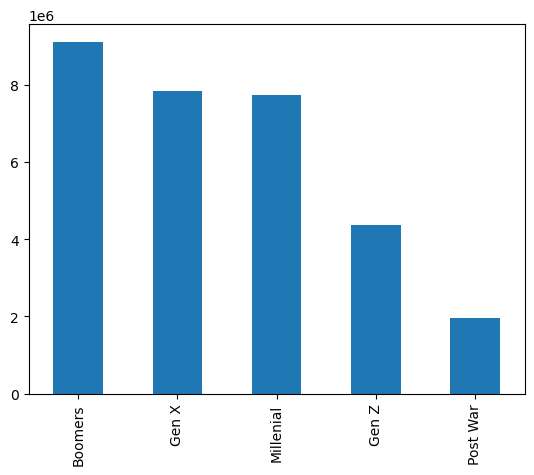

In [28]:
#create generation bar chart
generation_bar = ords_prods_all['generation'].value_counts().plot.bar()

In [130]:
#export generation bar chart
generation_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'generation_bar.png'), bbox_inches='tight')

### E. Compare Generation vs Region

In [30]:
#create crosstab of region and generation
crosstab_2 = pd.crosstab(ords_prods_all['region'], ords_prods_all['generation'], dropna = False)

In [31]:
#check crosstab_2 output
crosstab_2.head()

generation,Boomers,Gen X,Gen Z,Millenial,Post War
region,,,,,
Midwest,2114198,1872584,1004567,1820456,455902
Northeast,1632591,1381944,764699,1345117,345717
South,3016108,2551031,1491433,2601619,660271
West,2342451,2026462,1097806,1969856,497852


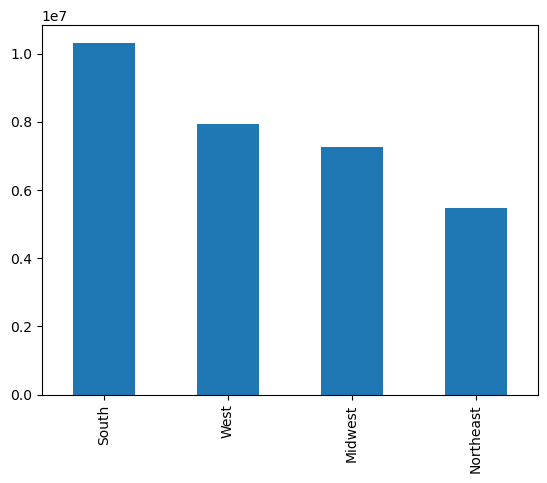

In [32]:
#create bar chart for regions
region_bar = ords_prods_all['region'].value_counts().plot.bar()

In [125]:
#export region bar chart
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'),bbox_inches='tight')

### F. Compare Departments vs Region

In [34]:
#create data dictionary for departments
data_dict = df_departments.to_dict('index')

In [35]:
data_dict

{0: {'id': 1, 'department': 'frozen'},
 1: {'id': 2, 'department': 'other'},
 2: {'id': 3, 'department': 'bakery'},
 3: {'id': 4, 'department': 'produce'},
 4: {'id': 5, 'department': 'alcohol'},
 5: {'id': 6, 'department': 'international'},
 6: {'id': 7, 'department': 'beverages'},
 7: {'id': 8, 'department': 'pets'},
 8: {'id': 9, 'department': 'dry goods pasta'},
 9: {'id': 10, 'department': 'bulk'},
 10: {'id': 11, 'department': 'personal care'},
 11: {'id': 12, 'department': 'meat seafood'},
 12: {'id': 13, 'department': 'pantry'},
 13: {'id': 14, 'department': 'breakfast'},
 14: {'id': 15, 'department': 'canned goods'},
 15: {'id': 16, 'department': 'dairy eggs'},
 16: {'id': 17, 'department': 'household'},
 17: {'id': 18, 'department': 'babies'},
 18: {'id': 19, 'department': 'snacks'},
 19: {'id': 20, 'department': 'deli'},
 20: {'id': 21, 'department': 'missing'}}

In [36]:
#create crosstab for region vs department_id
region_dept = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['region'], dropna = False)

In [37]:
region_dept

region,Midwest,Northeast,South,West
department_id,,,,
1,498527,370817,710443,543555
2,7983,6268,11579,8581
3,262614,200136,373055,289221
4,2134116,1593004,3027478,2324678
5,34052,25034,48822,36766
6,60666,44678,84649,65998
7,598990,462931,859435,650578
8,21358,17734,29912,24061
9,193463,143817,272813,212043


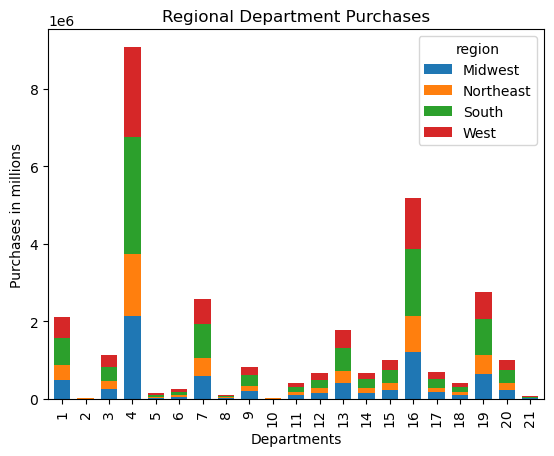

In [38]:
#create bar chart for region vs department
region_dept_bar = region_dept.plot(kind = 'bar', stacked = True, title = 'Regional Department Purchases', xlabel = 'Departments', ylabel= 'Purchases in millions', width = 0.7)

In [39]:
#export region_dept bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dept_bar.png'))

### G. Compare Departments vs Generation

In [40]:
#create crosstab for generation vs department_id
generation_dept = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['generation'], dropna = False)

In [41]:
generation_dept

generation,Boomers,Gen X,Gen Z,Millenial,Post War
department_id,,,,,
1,626533,538118,297732,525558,135401
2,10030,8691,5041,8555,2094
3,330066,285655,158577,280018,70710
4,2665004,2287541,1270468,2277567,578696
5,41741,36646,21695,36094,8498
6,74409,64460,36523,64384,16215
7,763050,653480,358984,634101,162319
8,27190,23529,14036,22288,6022
9,241067,208192,116729,204166,51982


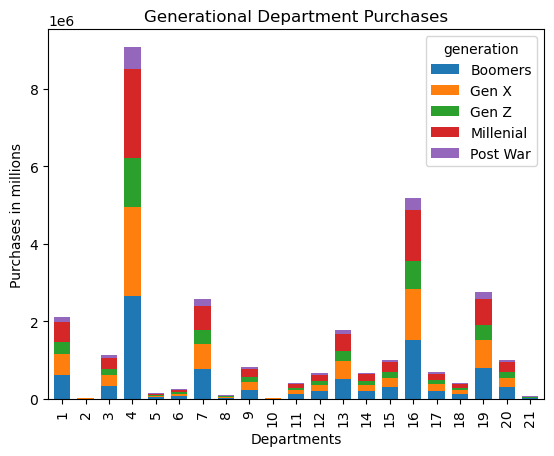

In [42]:
#create bar chart for generation and department
gen_dept_bar = generation_dept.plot(kind = 'bar', stacked = True, title = 'Generational Department Purchases', xlabel = 'Departments', ylabel= 'Purchases in millions', width = 0.7)

In [43]:
#export region_dept bar chart
gen_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'gen_dept_bar.png'))

### H. Create profile for households that purchase baby items

In [44]:
#create df for households purchasing baby items
df_babies = ords_prods_all[ords_prods_all['department_id'] == 18]

In [45]:
df_babies.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_dependents,marital_status,income,region,activity_level,generation
6634374,541735,720,4,1,8,6.0,45045,10,0,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,Male,Colorado,71,6/5/2017,0,divorced/widowed,133854,West,N,Boomers
6634376,1207316,1022,69,1,15,4.0,45045,11,0,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,Male,Alaska,43,7/17/2017,3,married,133279,West,N,Gen X
6634377,2133535,1022,74,6,19,3.0,45045,4,1,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,Male,Alaska,43,7/17/2017,3,married,133279,West,N,Gen X
6634378,2311330,1890,2,6,10,7.0,45045,17,0,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,Female,Arizona,53,7/24/2018,3,married,108183,West,N,Gen X
6634379,1151663,2002,11,2,21,8.0,45045,10,0,Organic Stage 3 Pumpkin Cranberry Apple Baby Food,...,Female,Idaho,49,9/14/2017,1,married,169627,West,N,Gen X


#### i. Explore baby item purchases by region

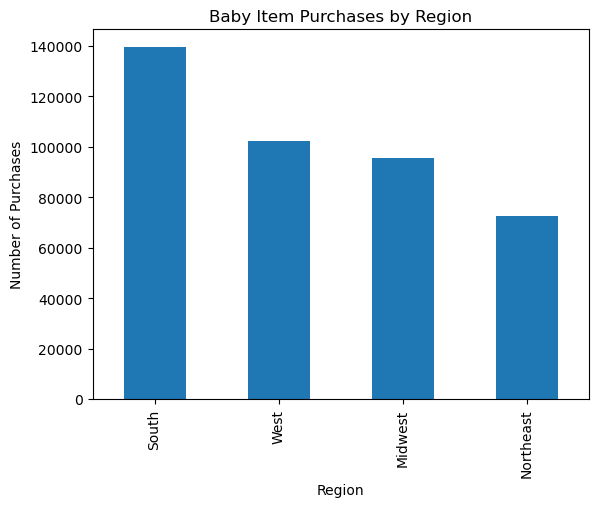

In [46]:
#create bar chart for babies vs region
babies_region_bar = df_babies['region'].value_counts().plot.bar(title = 'Baby Item Purchases by Region', xlabel = 'Region', ylabel= 'Number of Purchases')

In [129]:
#export babies_region_bar chart
babies_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babies_region_bar.png'), bbox_inches='tight')

#### ii. Explore baby item purchases by generation

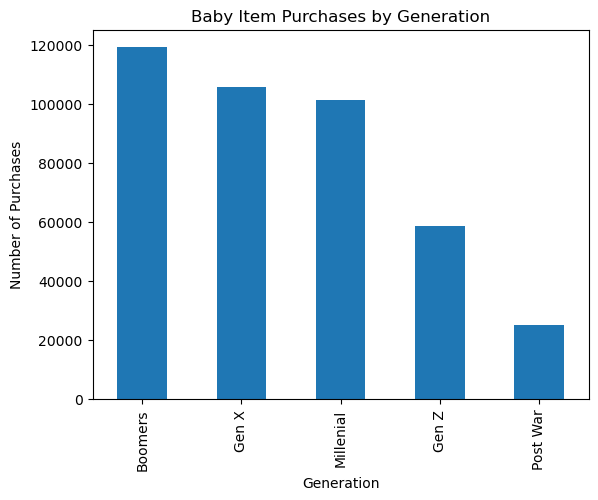

In [48]:
#create bar chart for babies vs region
babies_gen_bar = df_babies['generation'].value_counts().plot.bar(title = 'Baby Item Purchases by Generation', xlabel = 'Generation', ylabel= 'Number of Purchases')

In [128]:
#export babies_generation bar chart
babies_gen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babies_gen_bar.png'), bbox_inches='tight')

#### iii. Determine most purchased item in baby department

In [50]:
import statistics

In [51]:
#determine most purchased product in baby department
statistics.mode(df_babies ['product_name'])

'Baby Food Stage 2 Blueberry Pear & Purple Carrot'

#### iv. Generational baby department purchases by number of dependents

In [52]:
#create crosstab for number of dependents vs generation
babies_dependents = pd.crosstab(df_babies['number_dependents'], ords_prods_all['generation'], dropna = False)
babies_dependents

generation,Boomers,Gen X,Gen Z,Millenial,Post War
number_dependents,,,,,
0,29513,25862,14831,26738,6384
1,29168,25221,15420,24515,5581
2,31643,26576,15204,23931,7220
3,28978,28162,13364,26259,5822


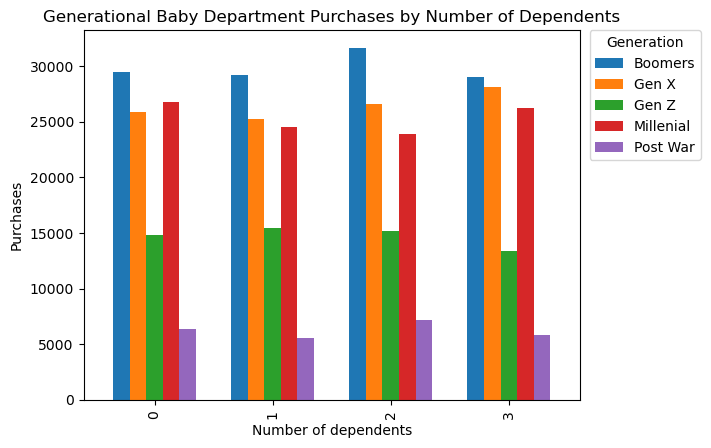

In [53]:
babies_dep_gen_bar = babies_dependents.plot(kind = 'bar', title = 'Generational Baby Department Purchases by Number of Dependents', xlabel = 'Number of dependents', ylabel= 'Purchases', width = 0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Generation')

In [54]:
#export babies_generation bar chart
babies_dep_gen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babies_dependents_gen_bar.png'))

### I. Create Income Level Column

In [55]:
#create income level - low income under 52,200
ords_prods_all.loc[(ords_prods_all['income'] < 52200), 'income_level'] = 'Low income'

/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_4639/3418838699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all.loc[(ords_prods_all['income'] < 52200), 'income_level'] = 'Low income'


In [56]:
#create income level - middle income 52,200-156,600
ords_prods_all.loc[(ords_prods_all['income'] >= 52200) & (ords_prods_all['income'] <=156600), 'income_level'] = 'Middle income'

In [57]:
#create income level high income 52,200-156,600
ords_prods_all.loc[(ords_prods_all['income'] >156600), 'income_level'] = 'High income'

In [58]:
#create income_level column
ords_prods_all['income_level'].value_counts(dropna = False)

Middle income    24563138
Low income        3695708
High income       2733818
Name: income_level, dtype: int64

In [59]:
#check output
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,marital_status,income,region,activity_level,generation,income_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,N,Millenial,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,N,Millenial,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,N,Millenial,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,N,Millenial,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,N,Millenial,Low income


In [60]:
#export to pickle
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_income.pkl'))

#### i. Compare region vs income level

In [61]:
#create crosstab for region vs income_level
region_income = pd.crosstab(ords_prods_all['income_level'], ords_prods_all['region'], dropna = False)

In [62]:
#check output
region_income

region,Midwest,Northeast,South,West
income_level,,,,
High income,635806,476269,920901,700842
Low income,865365,649222,1258511,922610
Middle income,5766536,4344577,8141050,6310975


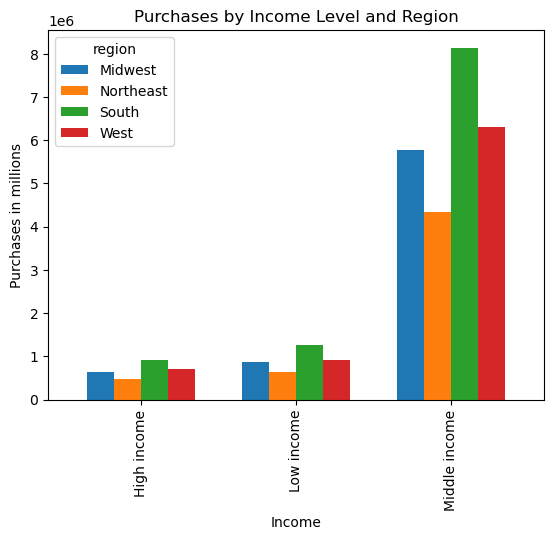

In [63]:
#create bar chart for generation and department
region_income_bar = region_income.plot(kind = 'bar', title = 'Purchases by Income Level and Region', xlabel = 'Income', ylabel= 'Purchases in millions', width = 0.7)

#### ii. Compare purchases by income level

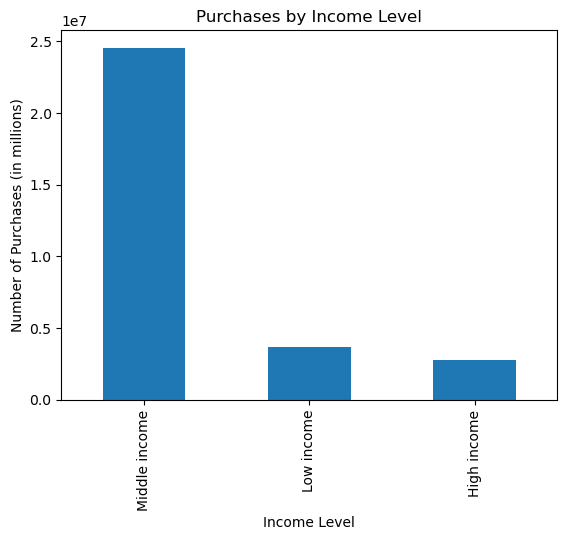

In [64]:
#create bar chart for purchases by income
income_level_bar = ords_prods_all['income_level'].value_counts().plot.bar(title = 'Purchases by Income Level', xlabel = 'Income Level', ylabel= 'Number of Purchases (in millions)')

In [127]:
#export region_income_bar chart
region_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income_bar.png'), bbox_inches='tight')

In [66]:
#export income_level_bar chart
income_level_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_level_bar.png'))

### J. Create Profile for Single Adult Households With No Dependents

In [67]:
#create subset for single marital status
single_no_dep = ords_prods_all.loc[(ords_prods_all['marital_status'] == 'single') & (ords_prods_all['number_dependents'] == 0)]

In [68]:
single_no_dep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,marital_status,income,region,activity_level,generation,income_level
97,1927023,387,2,4,10,22.0,196,3,0,Soda,...,Ohio,38,4/11/2019,0,single,72564,Midwest,N,Millenial,Middle income
100,1665683,423,3,2,11,7.0,196,3,0,Soda,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
101,3096825,423,19,2,11,7.0,196,2,1,Soda,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
123,3010461,691,4,6,12,9.0,196,1,0,Soda,...,North Carolina,24,9/1/2018,0,single,56479,South,N,Gen Z,Middle income
124,962470,691,14,6,15,19.0,196,1,1,Soda,...,North Carolina,24,9/1/2018,0,single,56479,South,N,Gen Z,Middle income


In [69]:
single_no_dep.shape

(5099271, 33)

In [70]:
#export single no dependents profile to pickle
single_no_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'single_no_dependents.pkl'))

#### i. Single Adult Purchases by Time of Day

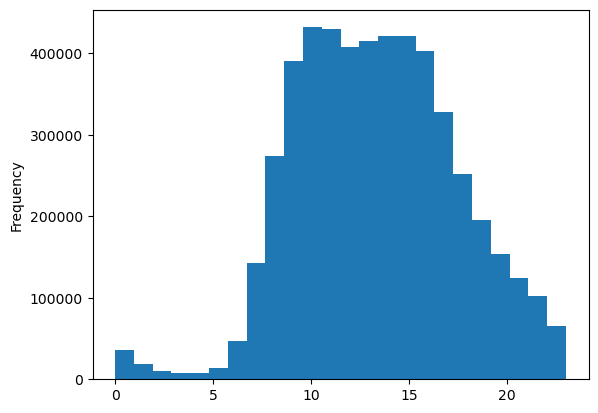

In [71]:
#create histogram to dermine what time single adults tend to make purchases
single_order_hour = single_no_dep['order_hour_of_day'].plot.hist(bins = 24)

In [72]:
#export histogram
single_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_order_hour.png'))

In [73]:
#statistical analysis, aggregate by hour of day
single_no_dep.groupby('order_hour_of_day').agg({'order_number': ['count','min', 'max', 'mean', 'median']})

order_number                          
                         count min max       mean median
order_hour_of_day                                       
0                        35316   1  99  16.956139   11.0
1                        18161   1  99  16.005176   10.0
2                        10572   1  96  16.142452   10.0
3                         7938   1  94  17.314563   11.0
4                         8212   1  97  18.064905   11.0
5                        13529   1  99  20.225589   13.0
6                        47332   1  99  20.391469   14.0
7                       142925   1  99  20.568424   14.0
8                       273708   1  99  19.913802   13.0
9                       390527   1  99  19.516717   13.0
10                      431852   1  99  18.660888   12.0
11                      430122   1  99  18.219568   12.0
12                      408117   1  99  17.764310   12.0
13                      415048   1  99  17.659808   11.0
14                      421194   1  99  17.740336   12.0
15                      420615   1  99  17.558118   11.0
16                      402855   1  99  17.160120   11.0
17                      328064   1  99  16.749326   11.0
18                      252163   1  99  16.328311   10.0
19                      195209   1  99  16.600818   10.0
20                      153245   1  99  17.338262   11.0
21                      124722   1  99  17.921706   12.0
22                      102351   1  99  17.234741   11.0
23                       65494   1  99  17.248130   11.0

#### ii. Single Adult Purchases by Department ID

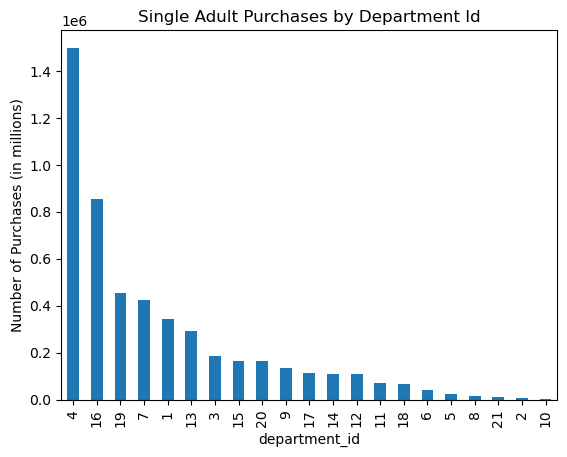

In [74]:
#create bar chart for department_id
single_department_bar = single_no_dep['department_id'].value_counts().plot.bar(title = 'Single Adult Purchases by Department Id', xlabel = 'department_id', ylabel= 'Number of Purchases (in millions)')

In [75]:
#export single department
single_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_department_bar.png'))

In [76]:
#determine most purchased product in by single adults
statistics.mode(single_no_dep ['product_name'])

'Banana'

In [77]:
#statistical analysis, aggregate by department_id
single_no_dep.groupby('department_id').agg({'order_number': ['count','min', 'max', 'mean', 'median']})

order_number                          
                     count min max       mean median
department_id                                       
1                   345687   1  99  16.035749   10.0
2                     5872   1  99  18.520947   12.0
3                   186442   1  99  17.886115   12.0
4                  1498347   1  99  18.585582   12.0
5                    24974   1  99  17.932970   11.0
6                    42647   1  99  17.442587   11.0
7                   424468   1  99  18.016218   12.0
8                    15577   1  99  15.170315   10.0
9                   134045   1  99  16.801470   11.0
10                    5324   1  99  20.450038   14.0
11                   69918   1  99  17.046683   11.0
12                  108257   1  99  16.622445   11.0
13                  292062   1  99  17.471475   11.0
14                  111086   1  99  17.431990   11.0
15                  166752   1  99  17.347468   11.0
16                  854226   1  99  18.502952   12.0
17                  112912   1  99  16.455160   11.0
18                   68977   1  99  20.230758   14.0
19                  454194   1  99  17.826785   12.0
20                  166633   1  99  17.186104   11.0
21                   10871   1  99  24.566001   18.0

#### iii. Income level of single adults with no dependents

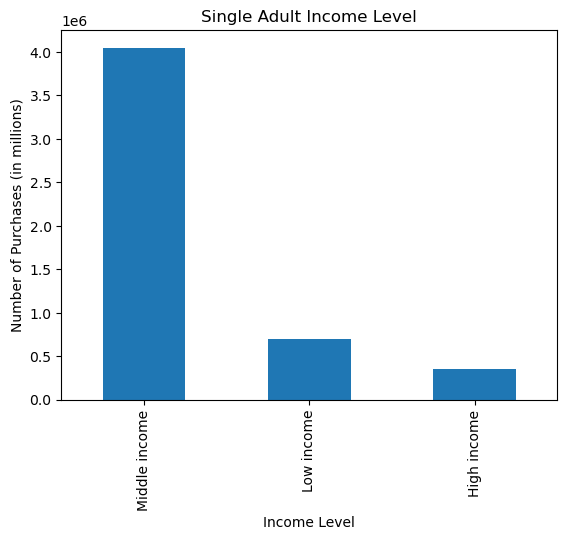

In [78]:
#create bar chart for income level
single_income_bar = single_no_dep['income_level'].value_counts().plot.bar(title = 'Single Adult Income Level', xlabel = 'Income Level', ylabel= 'Number of Purchases (in millions)')

In [164]:
#export single income bar
single_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_income_bar.png'), bbox_inches='tight')

#### iv. Single adults by generation

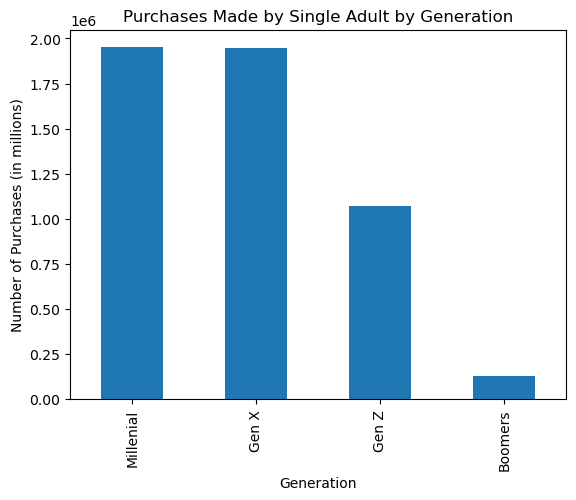

In [80]:
#create bar chart for single adult by generation
single_gen_bar = single_no_dep['generation'].value_counts().plot.bar(title = 'Purchases Made by Single Adult by Generation', xlabel = 'Generation', ylabel= 'Number of Purchases (in millions)')

In [126]:
#export single adult by generation bar
single_gen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_generation_bar.png'), bbox_inches='tight')

#### v. Single adult dairy/egg purchases

In [82]:
single_dairy_eggs = single_no_dep.loc[single_no_dep['department_id'].isin([16])]
single_dairy_eggs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,number_dependents,marital_status,income,region,activity_level,generation,income_level
35808,1253247,423,16,2,11,7.0,14084,3,0,Organic Unsweetened Vanilla Almond Milk,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
35809,3359468,423,20,2,12,14.0,14084,2,1,Organic Unsweetened Vanilla Almond Milk,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
35810,2126299,423,24,2,10,7.0,14084,2,1,Organic Unsweetened Vanilla Almond Milk,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
35811,3380101,423,27,2,14,7.0,14084,5,1,Organic Unsweetened Vanilla Almond Milk,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income
35812,970507,423,31,2,9,7.0,14084,1,1,Organic Unsweetened Vanilla Almond Milk,...,Indiana,22,9/28/2019,0,single,47180,Midwest,N,Gen Z,Low income


In [83]:
#determine most purchased dairy product in by single adults
statistics.mode(single_dairy_eggs ['product_name'])

'Organic Whole Milk'

#### vi. Single adults by region

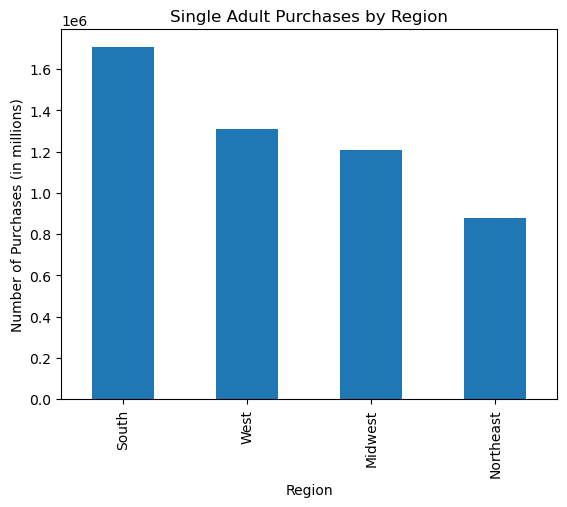

In [84]:
#create bar chart for region
single_region_bar = single_no_dep['region'].value_counts().plot.bar(title = 'Single Adult Purchases by Region', xlabel = 'Region', ylabel= 'Number of Purchases (in millions)')

In [85]:
#create crosstab for generation vs region
single_generation_region = pd.crosstab(single_no_dep ['generation'], single_no_dep['region'], dropna = False)
single_generation_region.head()

region,Midwest,Northeast,South,West
generation,,,,
Boomers,28770,25435,41492,33374
Gen X,469684,328449,633575,517109
Gen Z,238651,194120,373714,263720
Millenial,469669,328580,657543,495386


#### vii. Single adults by region and generation

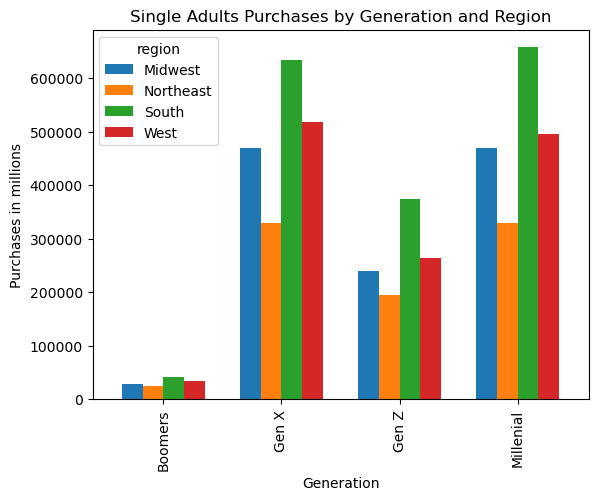

In [86]:
#create bar chart for generation and region
single_gen_region_bar = single_generation_region.plot(kind = 'bar', title = 'Single Adults Purchases by Generation and Region', xlabel = 'Generation', ylabel= 'Purchases in millions', width = 0.7)

In [163]:
#export single adult by generation bar
single_gen_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_generation_region_bar.png'), bbox_inches='tight')

#### viii. Single adults by generation and order frequency

In [88]:
#create crosstab for generation vs order frequency
single_generation_frequency = pd.crosstab(single_no_dep ['generation'], single_no_dep['order_frequency_flag'], dropna = False)
single_generation_frequency.head()

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
generation,,,
Boomers,88972,11605,28494
Gen X,1337408,179552,431857
Gen Z,714835,105077,250293
Millenial,1328077,177175,445926


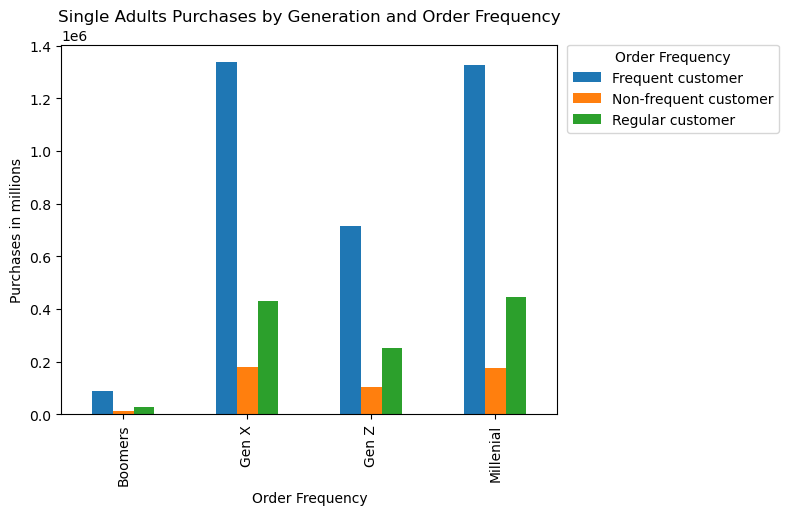

In [89]:
#create bar chart for generation and order frequency
single_gen_freq_bar = single_generation_frequency.plot(kind = 'bar', title = 'Single Adults Purchases by Generation and Order Frequency', xlabel = 'Order Frequency', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Order Frequency')

In [90]:
#export single adult by generation and frequency bar
single_gen_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_generation_frequency_bar.png'), bbox_inches='tight')

#### ix. Single adults by order day of week

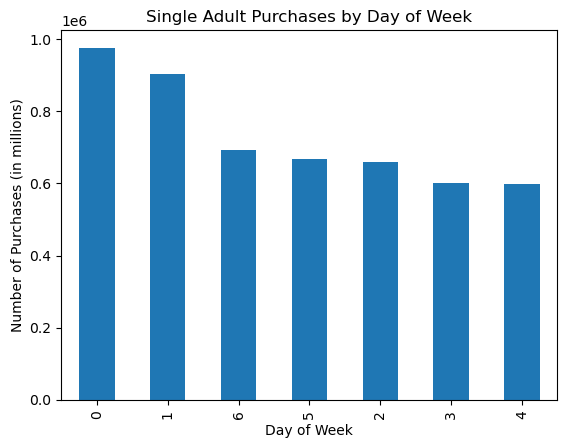

In [91]:
#create bar chart for order day of week
single_dow_bar = single_no_dep['orders_day_of_week'].value_counts().plot.bar(title = 'Single Adult Purchases by Day of Week', xlabel = 'Day of Week', ylabel= 'Number of Purchases (in millions)')

In [92]:
#export single adult by generation and frequency bar
single_dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'single_dow_bar.png'))

In [93]:
#statistical analysis of number of orders day of week, aggregate by order_number
single_no_dep.groupby('orders_day_of_week').agg({'order_number': ['count','min', 'max', 'mean', 'median']})

order_number                          
                          count min max       mean median
orders_day_of_week                                       
0                        975474   1  99  16.828199   11.0
1                        904040   1  99  18.308174   12.0
2                        659382   1  99  17.993335   12.0
3                        602306   1  99  18.516952   12.0
4                        599128   1  99  18.846260   12.0
5                        666373   1  99  18.698169   12.0
6                        692568   1  99  16.959377   11.0

### K. Explore number of dependents

In [94]:
#statistical analysis of number of dependents, aggregate by order_number
ords_prods_all.groupby('number_dependents').agg({'order_number': ['count','min', 'max', 'mean', 'median']})

order_number                          
                         count min max       mean median
number_dependents                                       
0                      7747032   1  99  17.957993   12.0
1                      7725981   1  99  17.792968   12.0
2                      7740199   1  99  17.747467   12.0
3                      7779452   1  99  17.836253   12.0

#### i. Compare number of dependents vs spending

In [95]:
#create crosstab for generation vs region
dependents_spender = pd.crosstab(ords_prods_all['number_dependents'], ords_prods_all['spender_flag'], dropna = False)
dependents_spender.head()

spender_flag,High spender,Low spender
number_dependents,,
0,146478,7600546
1,143936,7582045
2,161132,7578953
3,152897,7626536


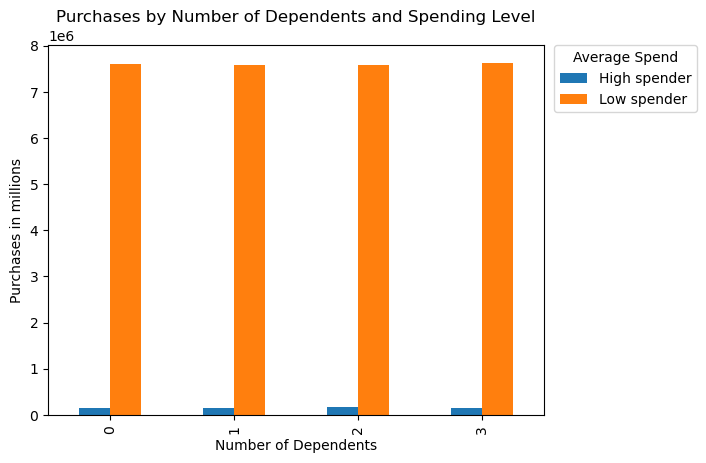

In [96]:
#create bar chart for dependents vs spender flag
dependents_spender_bar = dependents_spender.plot(kind = 'bar', title = 'Purchases by Number of Dependents and Spending Level', xlabel = 'Number of Dependents', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Average Spend')

In [165]:
#export bar chart
dependents_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependents_spender_bar.png'), bbox_inches = 'tight')

### L. Explore Spending level

#### i. Explore region vs spending level

In [98]:
#create crosstab for region vs spending level
region_spender = pd.crosstab(ords_prods_all['region'], ords_prods_all['spender_flag'], dropna = False)
region_spender.head()

spender_flag,High spender,Low spender
region,,
Midwest,148821,7118878
Northeast,103230,5366838
South,199701,10120647
West,152691,7781717


#### ii. Explore hour of day vs spending level

In [99]:
#create crosstab to compare hour of day vs spending level
hour_spender = pd.crosstab(ords_prods_all['order_hour_of_day'], ords_prods_all['spender_flag'], dropna = False)
hour_spender.head()

spender_flag,High spender,Low spender
order_hour_of_day,,
0,3517,204691
1,2129,107575
2,1742,63998
3,1124,47707
4,1300,49502


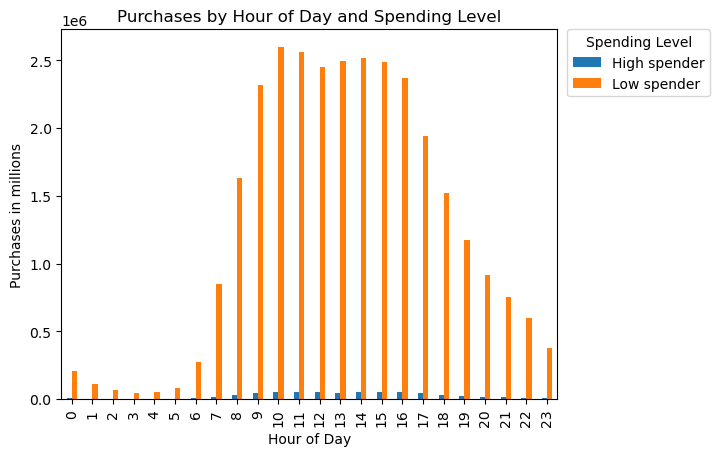

In [100]:
#create bar chart for hour vs spender flag
hour_spender_bar = hour_spender.plot(kind = 'bar', title = 'Purchases by Hour of Day and Spending Level', xlabel = 'Hour of Day', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Spending Level')

In [101]:
#export bar chart
hour_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_spender_bar.png'), dpi='figure', bbox_inches='tight')

### M. Create Product Price Range Column

In [102]:
#conver prices over 100 to NaN
ords_prods_all.loc[ords_prods_all['prices'] >100, 'prices'] = np.nan

In [103]:
#check output
ords_prods_all['prices'].max()

25.0

In [104]:
#define high range product
ords_prods_all.loc[ords_prods_all['prices'] > 15, 'price_range_loc'] = 'High Range Product'

/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_4639/2766753977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_all.loc[ords_prods_all['prices'] > 15, 'price_range_loc'] = 'High Range Product'


In [105]:
#define mid range product
ords_prods_all.loc[(ords_prods_all['prices'] <= 15) & (ords_prods_all['prices'] >5) , 'price_range_loc'] = 'Mid Range Product'

In [106]:
#define low range product
ords_prods_all.loc[ords_prods_all['prices'] <=5, 'price_range_loc'] = 'Low Range Product'

In [107]:
#check output
ords_prods_all['price_range_loc'].value_counts(dropna = False)

Mid Range Product     20919807
Low Range Product      9674900
High Range Product      393080
NaN                       4877
Name: price_range_loc, dtype: int64

In [108]:
# export to pickle
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_final.pkl'))

#### i. Purchases by product price range

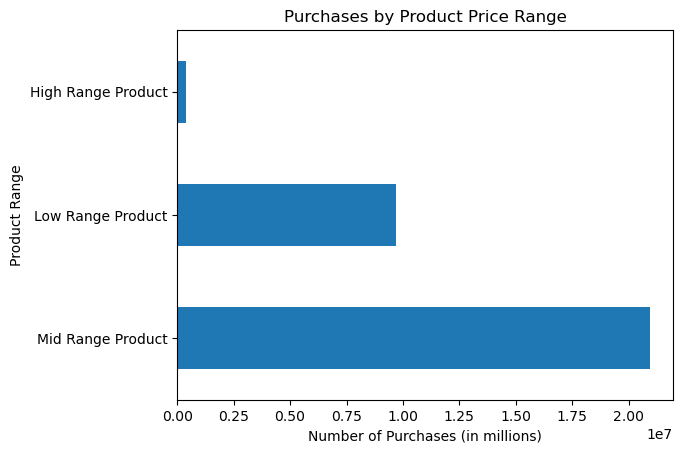

In [109]:
#create bar chart for price range
price_range_bar = ords_prods_all['price_range_loc'].value_counts().plot.barh(title = 'Purchases by Product Price Range', xlabel = 'Number of Purchases (in millions)', ylabel= 'Product Range')

In [110]:
#export bar chart
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_bar.png'), bbox_inches='tight')

### N. Purchases by Department ID

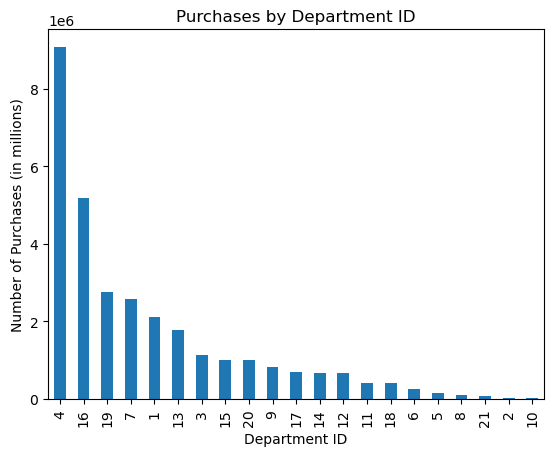

In [137]:
#create bar chart for purchases by department id
department_orders_bar = ords_prods_all['department_id'].value_counts().plot.bar(title = 'Purchases by Department ID', xlabel = 'Department ID', ylabel= 'Number of Purchases (in millions)')

In [112]:
#export bar chart
department_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_orders_bar.png'), bbox_inches='tight')

### O. Loyalty

#### i. Compare region vs loyalty

In [113]:
#create crosstab for region vs loyalty
region_loyalty = pd.crosstab(ords_prods_all['region'], ords_prods_all['loyalty_flag'], dropna = False)
region_loyalty.head()

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2375969,1137734,3754004
Northeast,1843750,842941,2783377
South,3408818,1595046,5316598
West,2665200,1232129,4037098


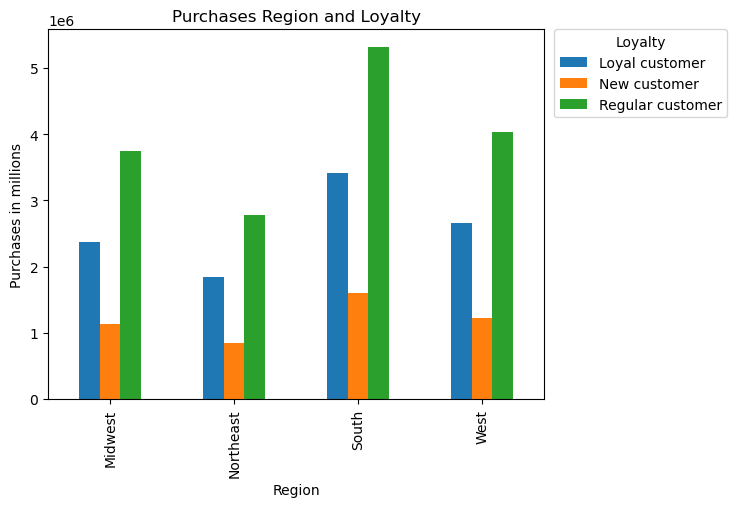

In [114]:
#create bar chart for region vs loyalty
region_loyalty_bar = region_loyalty.plot(kind = 'bar', title = 'Purchases Region and Loyalty', xlabel = 'Region', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Loyalty')

In [115]:
#export bar chart
region_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loyalty_bar.png'), bbox_inches='tight')

#### ii. Compare department vs loyalty

In [116]:
#create crosstab for department vs loyalty
department_loyalty = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['loyalty_flag'], dropna = False)
department_loyalty.head()

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609954,372565,1140823
2,10715,5839,17857
3,381686,172636,570704
4,3147376,1336607,4595293
5,38726,28647,77301


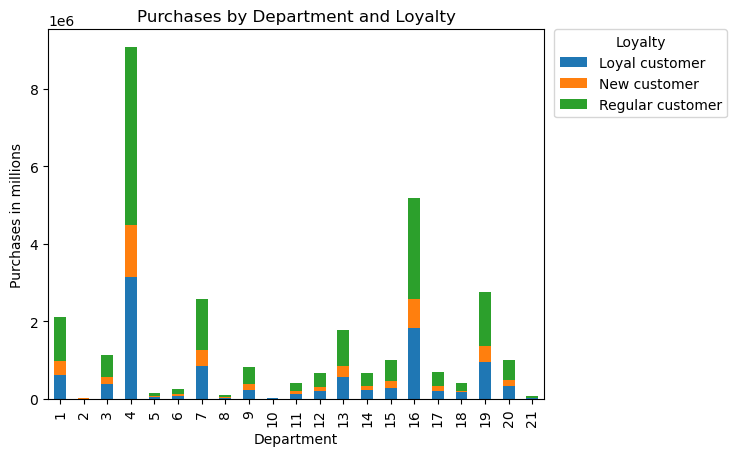

In [117]:
#create bar chart for department id vs loyalty
department_loyalty_bar = department_loyalty.plot(kind = 'bar', stacked = True, title = 'Purchases by Department and Loyalty', xlabel = 'Department', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Loyalty')

In [118]:
#export bar chart
department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_loyalty_bar.png'), bbox_inches='tight')

#### iii. Compare price range vs loyalty

In [119]:
#create crosstab for price range vs loyalty
price_range_loyalty = pd.crosstab(ords_prods_all['price_range_loc'], ords_prods_all['loyalty_flag'], dropna = False)
price_range_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High Range Product,118607,65030,209443
Low Range Product,3214703,1501300,4958897
Mid Range Product,6959097,3240621,10720089


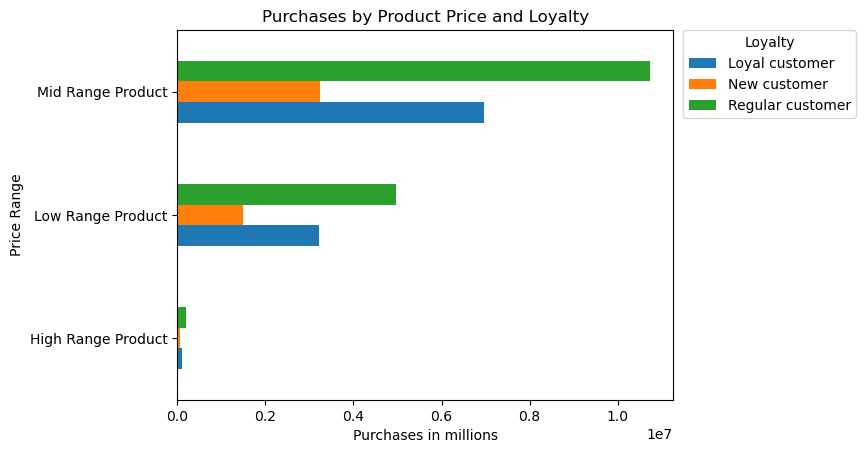

In [120]:
#create bar chart for price range vs loyalty
price_range_loyalty_bar = price_range_loyalty.plot(kind = 'barh', title = 'Purchases by Product Price and Loyalty', xlabel = 'Purchases in millions', ylabel= 'Price Range', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Loyalty')

In [121]:
#export bar chart
price_range_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loyalty_bar.png'), bbox_inches='tight')

#### iv. Compare loyalty vs spending level

In [122]:
#create crosstab for loyalty vs spending level
spender_loyalty = pd.crosstab(ords_prods_all['spender_flag'], ords_prods_all['loyalty_flag'], dropna = False)
spender_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
spender_flag,,,
High spender,217155,84181,303107
Low spender,10076582,4723528,15587970


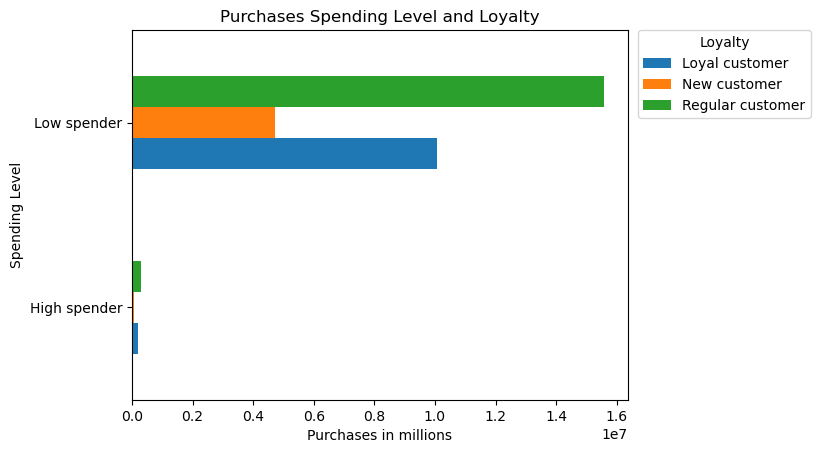

In [123]:
#create bar chart for spender flag vs loyalty
spender_loyalty_bar = spender_loyalty.plot(kind = 'barh', title = 'Purchases Spending Level and Loyalty', xlabel = 'Purchases in millions', ylabel= 'Spending Level', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Loyalty')

In [150]:
#export bar chart
spender_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spender_loyalty_bar.png'), bbox_inches='tight')

### P. Marital Status

#### i. Number of purchases by marital status

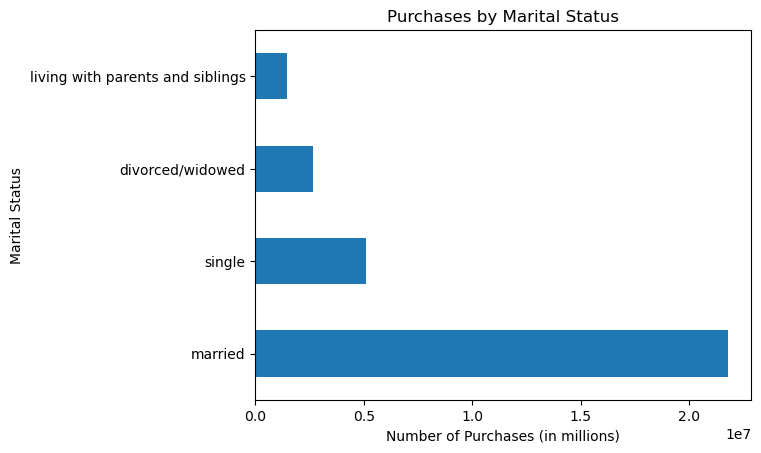

In [134]:
#create bar chart for purchases by marital status
marital_bar = ords_prods_all['marital_status'].value_counts().plot.barh(title = 'Purchases by Marital Status', xlabel = 'Number of Purchases (in millions)', ylabel= 'Marital Status')

In [149]:
#export bar chart
marital_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_bar.png'), bbox_inches='tight')

#### ii. Compare loyalty vs marital status

In [142]:
#create crosstab for loyalty vs marital status
marital_loyalty = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['loyalty_flag'], dropna = False)
marital_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
marital_status,,,
divorced/widowed,883487,404149,1360125
living with parents and siblings,493265,221968,767378
married,7208852,3383546,11170623
single,1708133,798187,2592951


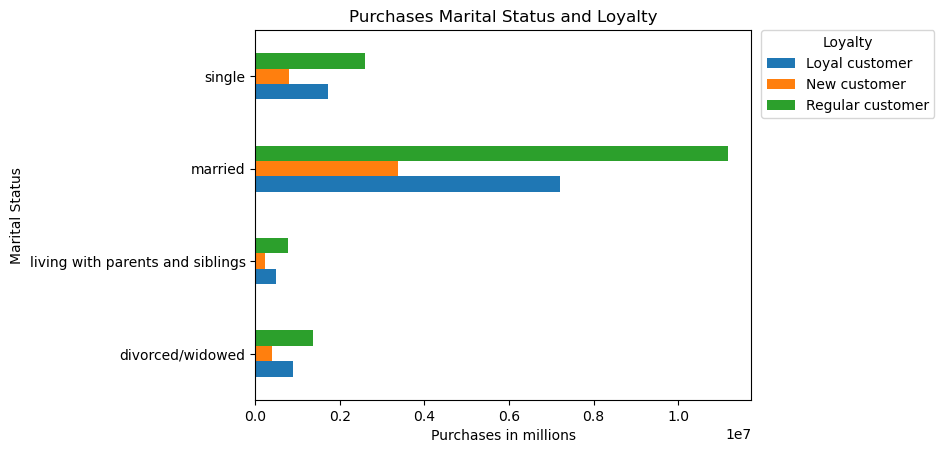

In [139]:
#create bar chart for marital_status vs loyalty
marital_loyalty_bar = marital_loyalty.plot(kind = 'barh', title = 'Purchases Marital Status and Loyalty', xlabel = 'Purchases in millions', ylabel= 'Marital Status', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Loyalty')

In [151]:
#export bar chart
marital_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_loyalty_bar.png'), bbox_inches='tight')

#### iii. Compare department purchases vs marital status

In [143]:
#create crosstab for loyalty vs marital status
marital_dept = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['marital_status'], dropna = False)
marital_dept

marital_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,184062,103069,1490524,345687
2,2842,1815,23882,5872
3,96044,53910,788630,186442
4,777095,430539,6373295,1498347
5,11878,8380,99442,24974
6,21814,12394,179136,42647
7,220881,119108,1807477,424468
8,8025,5338,64125,15577
9,70251,39542,578298,134045


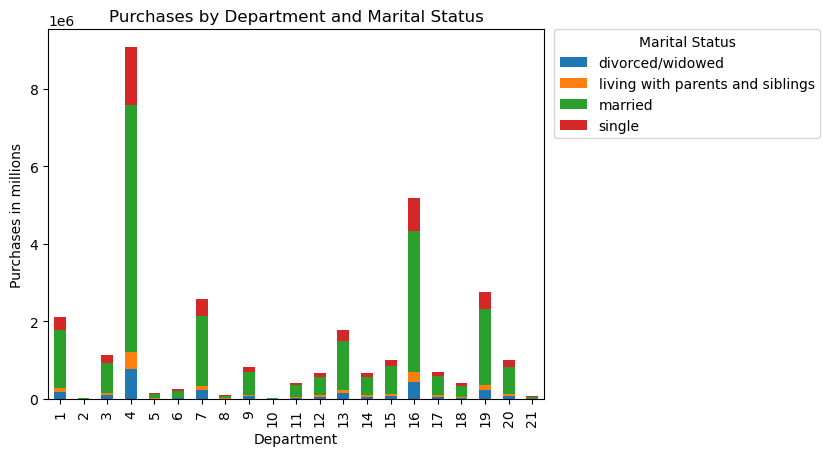

In [145]:
#create bar chart for marital_status vs department_id
marital_dept_bar = marital_dept.plot(kind = 'bar', stacked = True, title = 'Purchases by Department and Marital Status', xlabel = 'Department', ylabel= 'Purchases in millions', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Marital Status')

In [147]:
#export bar chart
marital_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_dept_bar.png'), bbox_inches='tight')

#### iv. Compare loyalty vs marital status

In [152]:
#create crosstab for loyalty vs marital status
marital_spender = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['spender_flag'], dropna = False)
marital_spender

spender_flag,High spender,Low spender
marital_status,,
divorced/widowed,50373,2597380
living with parents and siblings,27970,1454641
married,429995,21332893
single,96105,5003166


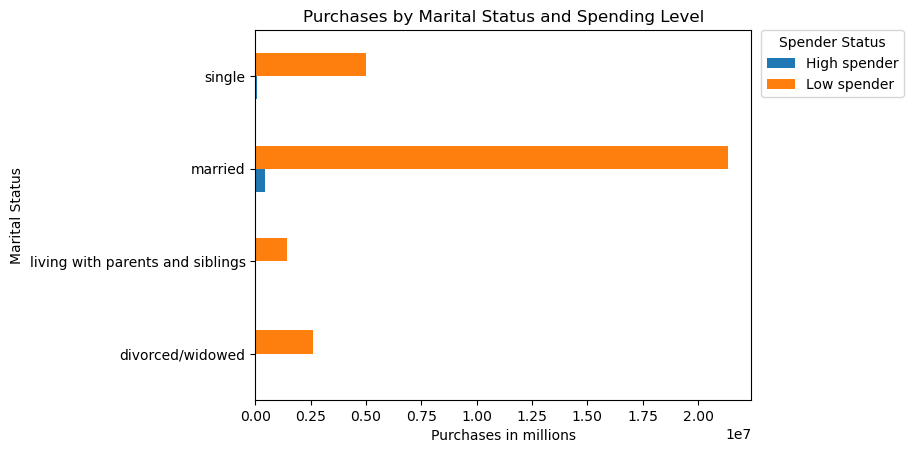

In [153]:
#create bar chart for marital_status vs loyalty
marital_spender_bar = marital_spender.plot(kind = 'barh', title = 'Purchases by Marital Status and Spending Level', xlabel = 'Purchases in millions', ylabel= 'Marital Status', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Spender Status')

In [154]:
#export bar chart
marital_spender_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_spender_bar.png'), bbox_inches='tight')

#### v. Compare order frequency vs marital status

In [157]:
#create crosstab for loyalty vs marital status
marital_freq = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['order_frequency_flag'], dropna = False)
marital_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1820300,244245,583216
living with parents and siblings,1031522,138914,312175
married,14900794,2040875,4821352
single,3469292,473409,1156570


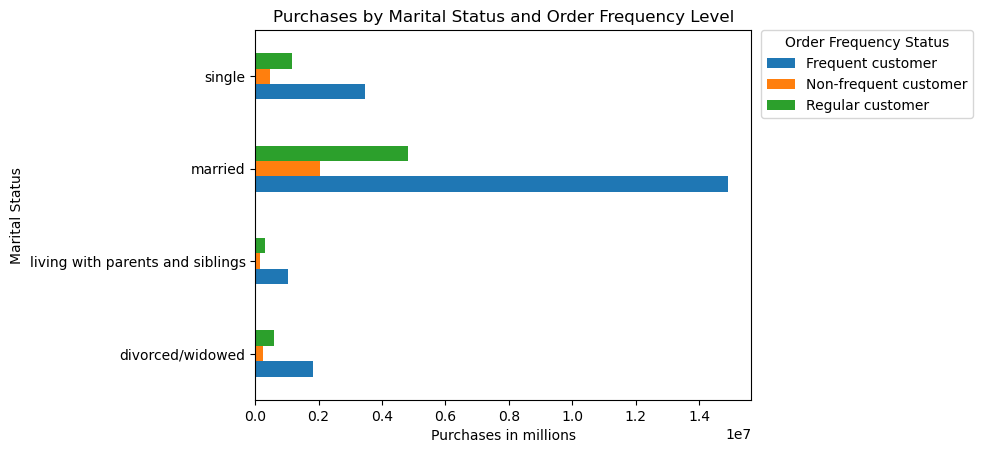

In [158]:
#create bar chart for marital_status vs loyalty
marital_freq_bar = marital_freq.plot(kind = 'barh', title = 'Purchases by Marital Status and Order Frequency Level', xlabel = 'Purchases in millions', ylabel= 'Marital Status', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Order Frequency Status')

In [159]:
#export bar chart
marital_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_freq_bar.png'), bbox_inches='tight')

#### vi. Compare marital status vs generation

In [160]:
#create crosstab for generation vs marital status
marital_gen = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['generation'], dropna = False)
marital_gen

generation,Boomers,Gen X,Gen Z,Millenial,Post War
marital_status,,,,,
divorced/widowed,2149218,0,0,0,498543
living with parents and siblings,0,0,1482611,0,0
married,6827059,5883204,1805689,5785870,1461199
single,129071,1948817,1070205,1951178,0


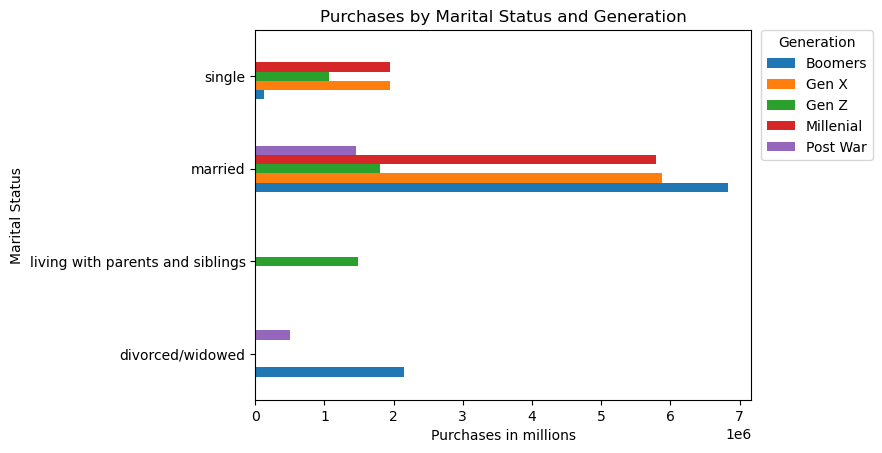

In [161]:
#create bar chart for marital status vs generation
marital_gen_bar = marital_gen.plot(kind = 'barh', title = 'Purchases by Marital Status and Generation', xlabel = 'Purchases in millions', ylabel= 'Marital Status', width = 0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'Generation')

In [162]:
#export bar chart
marital_gen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_gen_bar.png'), bbox_inches='tight')